# Historic Tour de France Stage Winners 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Loading Data

In [2]:
tour = pd.read_csv('stages_TDF.csv')
tour.head(10)

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA
5,6,2017-07-06,216.0,Vesoul,Troyes,Flat stage,Marcel Kittel,GER
6,7,2017-07-07,213.5,Troyes,Nuits-Saint-Georges,Flat stage,Marcel Kittel,GER
7,8,2017-07-08,187.5,Dole,Station des Rousses,Medium mountain stage,Lilian Calmejane,FRA
8,9,2017-07-09,181.5,Nantua,Chambéry,High mountain stage,Rigoberto Urán,COL
9,10,2017-07-11,178.0,Périgueux,Bergerac,Flat stage,Marcel Kittel,GER


In [3]:
tour.tail(10)

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
2226,3,1904-07-13,424.0,Marseille,Toulouse,Plain stage,Hippolyte Aucouturier,FRA
2227,4,1904-07-17,268.0,Toulouse,Bordeaux,Plain stage,Lucien Pothier,FRA
2228,5,1904-07-20,425.0,Bordeaux,Nantes,Plain stage,Hippolyte Aucouturier,FRA
2229,6,1904-07-23,471.0,Nantes,Paris,Plain stage,Hippolyte Aucouturier,FRA
2230,1,1903-07-01,467.0,Paris,Lyon,Plain stage,Maurice Garin,FRA
2231,2,1903-07-05,374.0,Lyon,Marseille,Stage with mountain(s),Hippolyte Aucouturier,FRA
2232,3,1903-07-08,423.0,Marseille,Toulouse,Plain stage,Hippolyte Aucouturier,FRA
2233,4,1903-07-12,268.0,Toulouse,Bordeaux,Plain stage,Charles Laeser,SUI
2234,5,1903-07-13,425.0,Bordeaux,Nantes,Plain stage,Maurice Garin,FRA
2235,6,1903-07-18,471.0,Nantes,Paris,Plain stage,Maurice Garin,FRA


## Preguntas
* ¿Cuántas etapas ha ganado un Mexicano?
* ¿Qué competidor ha ganado más?
* ¿Qué tipo de etapa predomina?
* ¿Cúales son las etapas con mayor distancia recorridad?
* ¿De qué nacionalidad han ganado más etapas?

### Entendiendo la base de datos

In [4]:
tour.shape

(2236, 8)

In [5]:
tour.columns

Index(['Stage', 'Date', 'Distance', 'Origin', 'Destination', 'Type', 'Winner',
       'Winner_Country'],
      dtype='object')

In [6]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stage           2236 non-null   object 
 1   Date            2236 non-null   object 
 2   Distance        2236 non-null   float64
 3   Origin          2236 non-null   object 
 4   Destination     2236 non-null   object 
 5   Type            2236 non-null   object 
 6   Winner          2236 non-null   object 
 7   Winner_Country  2184 non-null   object 
dtypes: float64(1), object(7)
memory usage: 139.9+ KB


###  Cambiar el dtype a datetime

In [7]:
tour['Date']=pd.to_datetime(tour['Date'])
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Stage           2236 non-null   object        
 1   Date            2236 non-null   datetime64[ns]
 2   Distance        2236 non-null   float64       
 3   Origin          2236 non-null   object        
 4   Destination     2236 non-null   object        
 5   Type            2236 non-null   object        
 6   Winner          2236 non-null   object        
 7   Winner_Country  2184 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 139.9+ KB


### Análisis de valores nulos

In [8]:
tour.isnull().sum()

Stage              0
Date               0
Distance           0
Origin             0
Destination        0
Type               0
Winner             0
Winner_Country    52
dtype: int64

In [9]:
tour.isnull().sum()/tour.shape[0]

Stage             0.000000
Date              0.000000
Distance          0.000000
Origin            0.000000
Destination       0.000000
Type              0.000000
Winner            0.000000
Winner_Country    0.023256
dtype: float64

In [10]:
null_countries = tour[tour['Winner_Country'].isnull()]
null_countries.index

Int64Index([  50,   87,  127,  171,  255,  319,  341,  360,  416,  468,  481,
             489,  512,  533,  553,  576,  598,  620,  643,  669,  694,  718,
             741,  767,  771,  787,  790,  812,  818,  839,  843,  865,  873,
             894,  907,  918,  972,  995, 1023, 1044, 1072, 1100, 1127, 1156,
            1177, 1201, 1227, 1251, 1274, 1388, 1434, 1459],
           dtype='int64')

### La cantidad de datos únicos es similar al total de valores

In [11]:
len(null_countries['Winner'].unique())

43

In [12]:
tour = tour.dropna()
tour.isnull().sum()

Stage             0
Date              0
Distance          0
Origin            0
Destination       0
Type              0
Winner            0
Winner_Country    0
dtype: int64

### Limpieza de datos

In [13]:
tour.Type.unique()

array(['Individual time trial', 'Flat stage', 'Medium mountain stage',
       'High mountain stage', 'Mountain time trial',
       'Flat cobblestone stage', 'Mountain stage', 'Mountain Stage',
       'Transition stage', 'Plain stage', 'Intermediate stage',
       'Hilly stage', 'Team time trial', 'Stage with mountain(s)',
       'Plain stage with cobblestones', 'Flat Stage', 'Half Stage',
       'Stage with mountain'], dtype=object)

In [14]:
tour.Type.replace(['Mountain stage', 'Stage with mountain(s)', 'Stage with mountain', 'Medium mountain stage', 'Mountain Stage', 'High mountain stage'], ['Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain', 'Mountain'], inplace=True)
tour.Type.replace(['Flat stage', 'Flat cobblestone stage', 'Plain stage', 'Plain stage with cobblestones', 'Flat Stage'], ['Flat', 'Flat', 'Flat', 'Flat', 'Flat'], inplace=True)
tour.Type.unique()

array(['Individual time trial', 'Flat', 'Mountain', 'Mountain time trial',
       'Transition stage', 'Intermediate stage', 'Hilly stage',
       'Team time trial', 'Half Stage'], dtype=object)

### ¿Cuántas etapas ha ganado un Mexicano?

In [15]:
tour.Winner_Country.head(10)

0    GBR
1    GER
2    SVK
3    FRA
4    ITA
5    GER
6    GER
7    FRA
8    COL
9    GER
Name: Winner_Country, dtype: object

In [16]:
tour.Winner_Country.unique()

array(['GBR', 'GER', 'SVK', 'FRA', 'ITA', 'COL', 'AUS', 'NED', 'SLO',
       'NOR', 'POL', 'BEL', 'RUS', 'ESP', 'CZE', 'LTU', 'IRL', 'POR',
       'SUI', 'USA', 'LUX', 'KAZ', 'DEN', 'RSA', 'UKR', 'AUT', 'EST',
       'SWE', 'UZB', 'LAT', 'IRE', 'URS', 'BRA', 'MEX', 'GDR', 'CAN',
       'FRG', 'c("FRA", "FRA")', 'c("BEL", "GER")', 'c("BEL", "BEL")'],
      dtype=object)

In [17]:
mex_winner = tour[tour['Winner_Country'] == 'MEX']['Winner']
mex = tour.iloc[mex_winner.index]
mex.reset_index()

,index,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,597,1,1989-07-02,135.5,Luxembourg City,Luxembourg City,Flat,Acácio da Silva,POR
1,616,20,1989-07-22,130.0,Aix-les-Bains,L'Isle-d'Abeau,Flat,Giovanni Fidanza,ITA


### ¿Qué competidor ha ganado más?

In [52]:
top10 = pd.DataFrame(tour.Winner.value_counts()[0:10])
top10

,Winner
Eddy Merckx,34
Mark Cavendish,30
Bernard Hinault,28
André Leducq,24
André Darrigade,22
Lance Armstrong[n 1],20
Nicolas Frantz,20
François Faber,18
Jean Alavoine,17
Charles Pélissier,16


<AxesSubplot:xlabel='Winner', ylabel='count'>

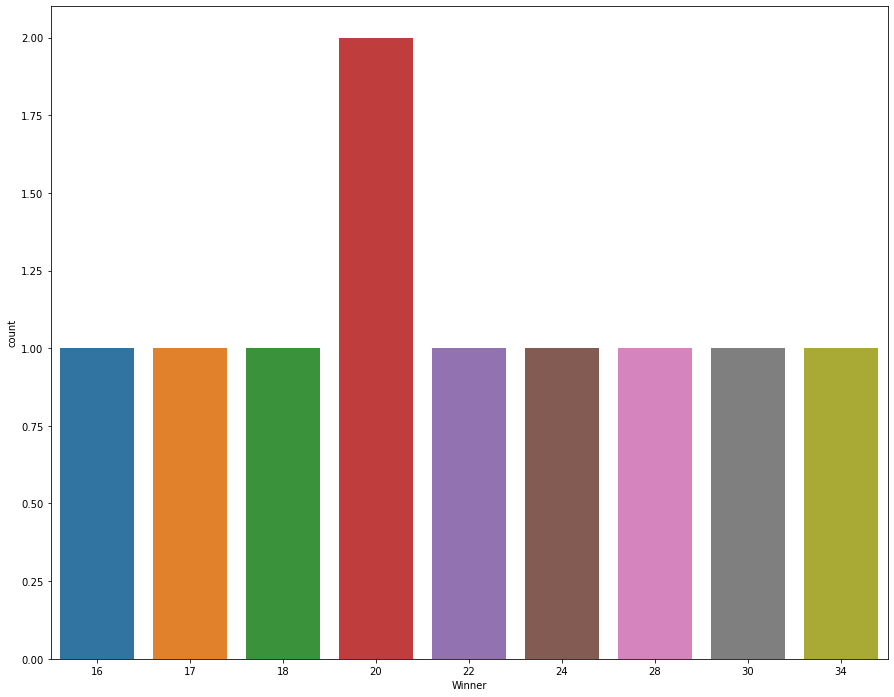

In [38]:
plt.figure(figsize=(15,12))
sns.countplot(x='Winner',data=df_winners)